In [1]:
import os
import sys
import math
import logging
from pathlib import Path

import numpy as np
import scipy as sp

%load_ext autoreload
%autoreload 2

import daft
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (12, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

## Generative Process

* For every topic $k\in\{1,\ldots,K\}$ draw a categorical distribution over the items $v\in\{1,\ldots,V\}$:
  $$\beta_{k,v}\sim\mathrm{Dirichlet}(\boldsymbol{\eta})$$

* For every user $u\in\{1,\ldots,U\}$ draw a categorical distribution over the topics $k\in\{1,\ldots,K\}$:
  $$\theta_{u,k}\sim\mathrm{Dirichlet}(\boldsymbol{\alpha})$$

* For every item $v\in\{1,\ldots,V\}$:
    * draw item popularity:
      $$\omega_v \sim \mathrm{HalfNormal}(0, \rho)$$
    * draw a topic index:
      $$z_{u,v}\sim\mathrm{Categorical}(\boldsymbol{\theta}_{u})$$

* For every interaction $r_{u,v} \in\{0,1\}$ of user $u$ with item $v$ where the number of total interactions is $R \ll |U\times V|$:
    * define the rating probability as the CDF of the exponential distribution:
        $$\mathcal{p}=1-\exp(-\omega_v\beta_{z_{u,v},v})$$
    * draw the rating:
        $$r_{u,v} \sim \mathrm{Bernoulli}(\mathcal{p})$$
    
    
    
Notation taken from [Comparing Bayesian Models of Annotation](https://www.aclweb.org/anthology/Q18-1040.pdf).

## Notes

* the popularity could also be defined on a cagegory level as an intermediate prior for each item.

## Plate Diagram

In [ ]:
k -> f, u, v zu |U|, |I|

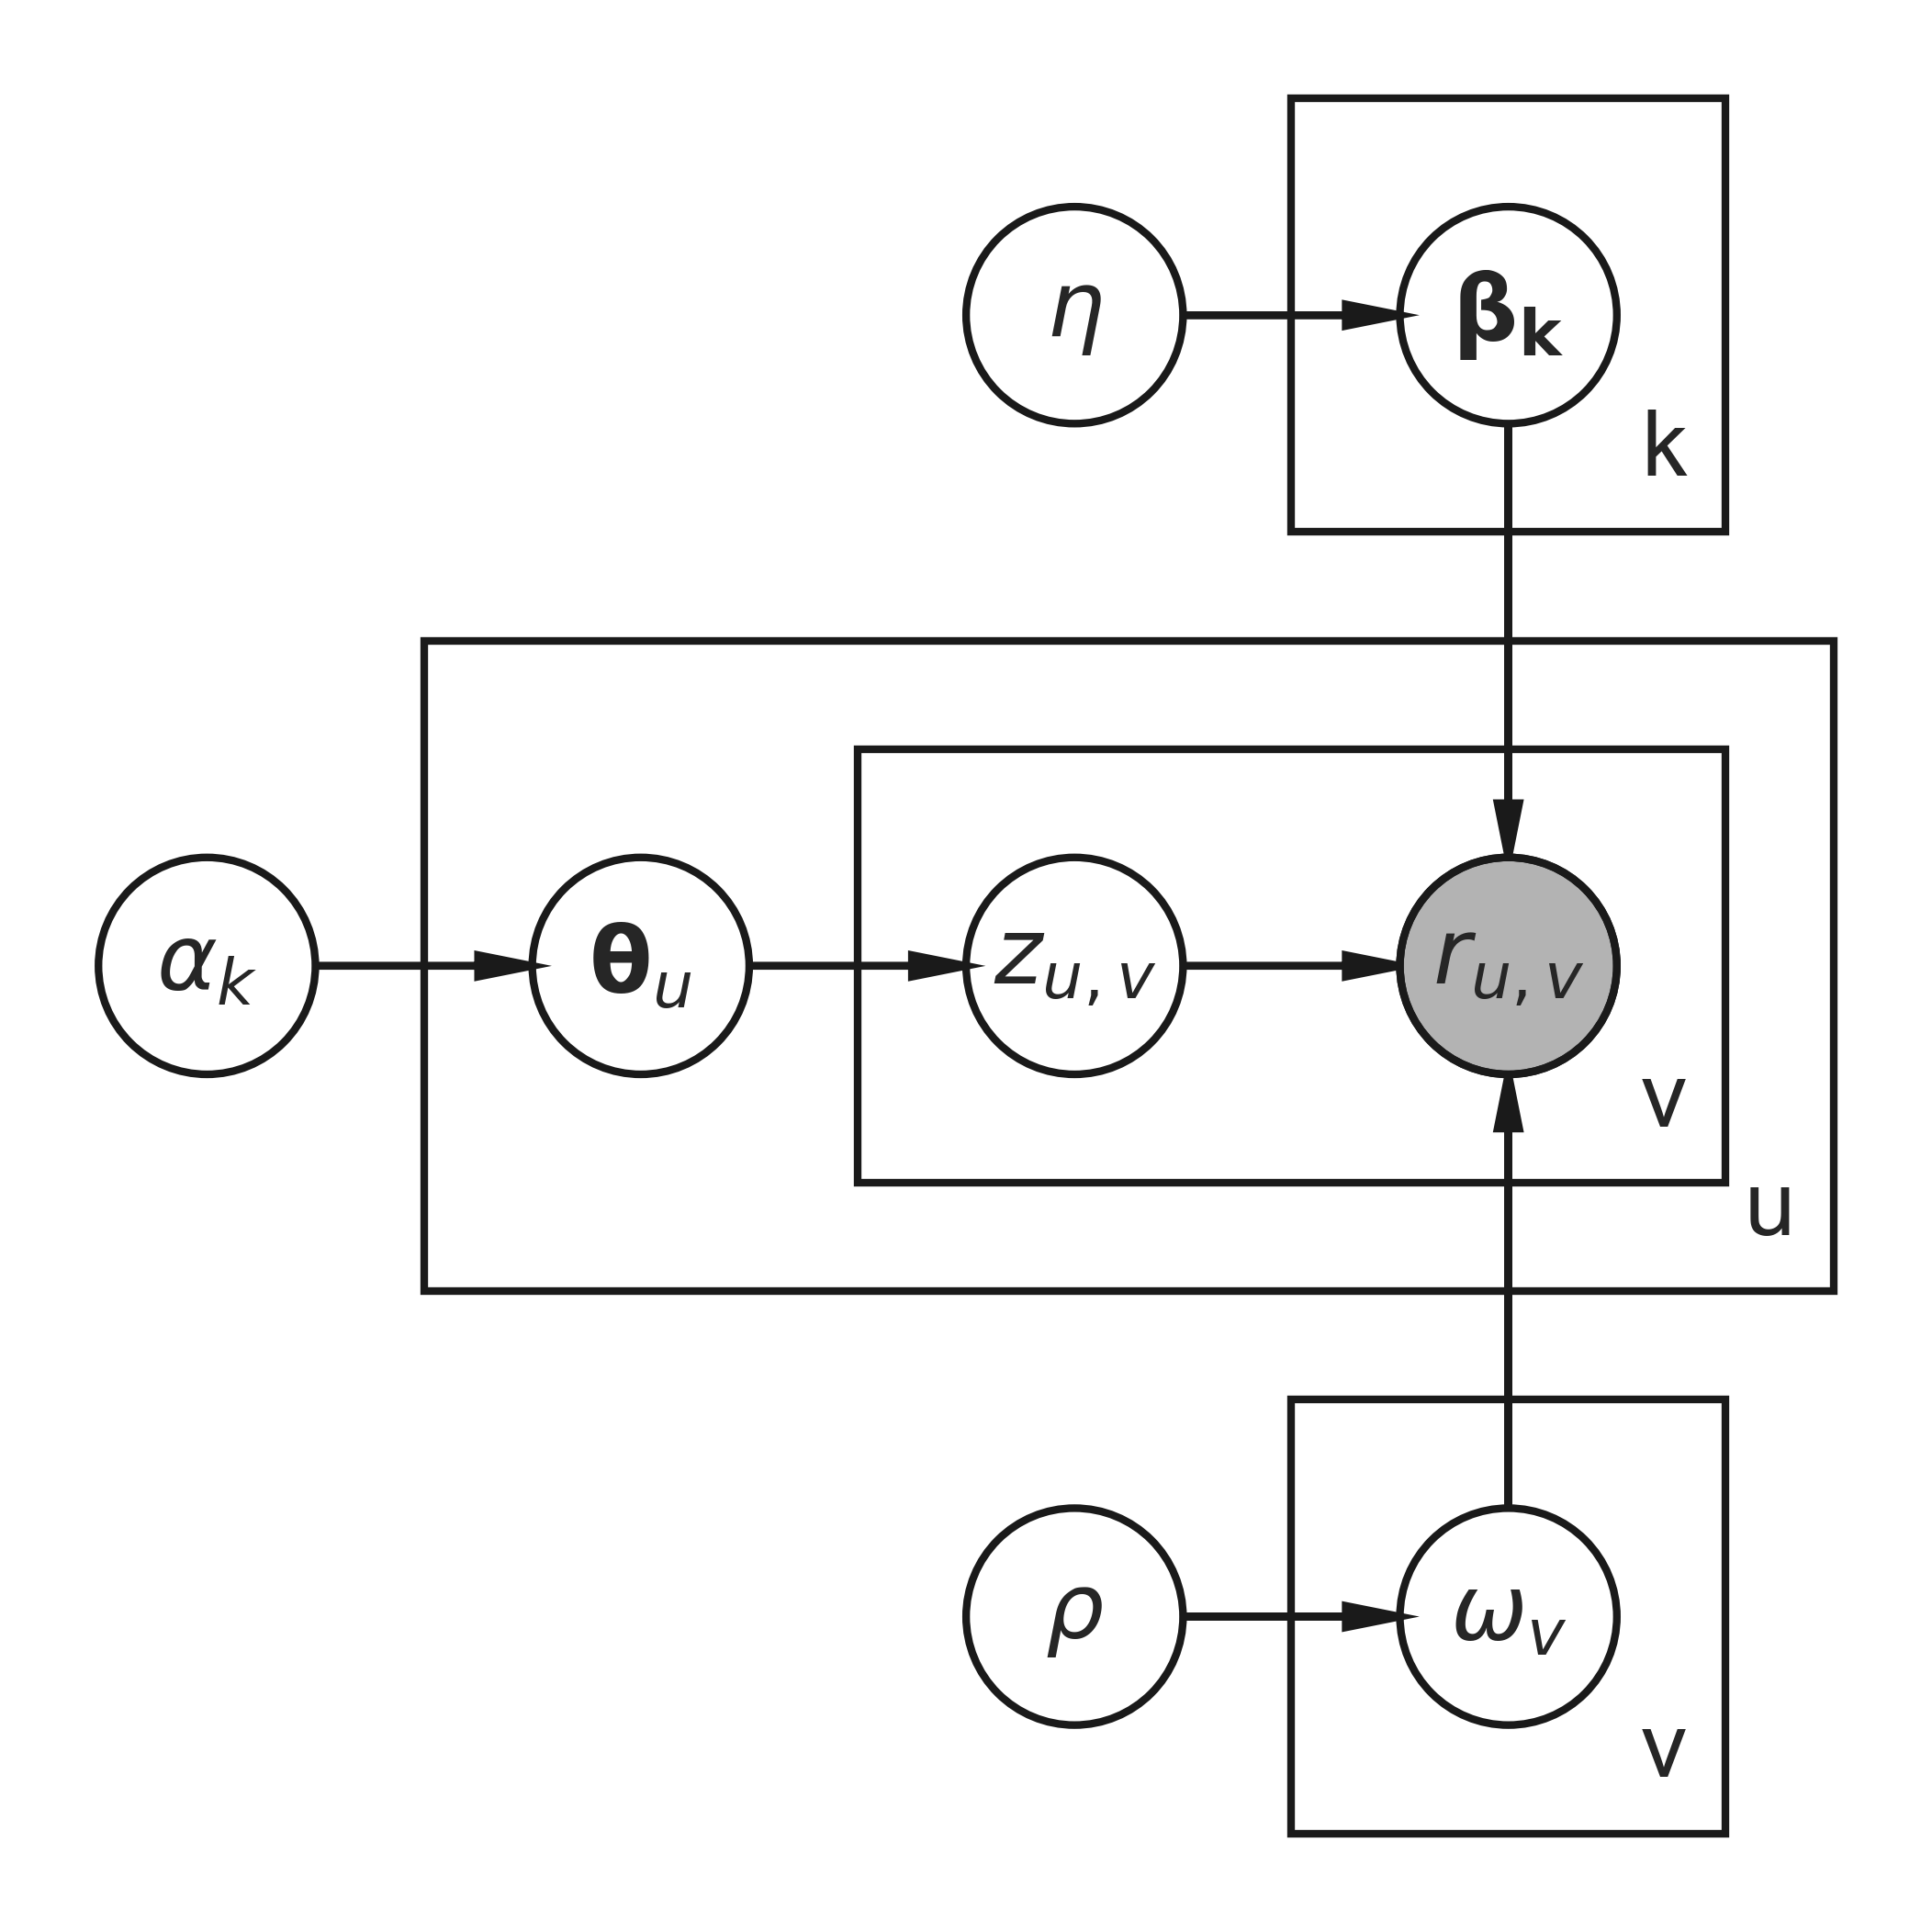

In [2]:
pgm = daft.PGM()
pgm.add_node("users_prior", r"$\alpha_{k}$", 0, 4)
pgm.add_node("users", r"$\mathbf{\theta}_{u}$", 1, 4)
pgm.add_node("user_topic_idx", r"$z_{u,v}$", 2, 4)
pgm.add_node("ratings", r"$r_{u,v}$", 3, 4, observed=True)
pgm.add_plate([1.5, 3.5, 2, 1], label=r"v", position='bottom right')
pgm.add_plate([0.5, 3.25, 3.25, 1.5], label=r"u", position='bottom right')

pgm.add_edge("users_prior", "users")
pgm.add_edge("users", "user_topic_idx")
pgm.add_edge("user_topic_idx", "ratings")

pgm.add_node("topics_prior", r"$\eta$", 2, 5.5)
pgm.add_node("topics", r"$\mathbf{\beta_{k}}$", 3, 5.5)
pgm.add_plate([2.5, 5, 1, 1], label=r"k", position='bottom right')
             
pgm.add_edge("topics_prior", "topics")
pgm.add_edge("topics", "ratings")

pgm.add_node("item_pop_prior", r"$\rho$", 2, 2.5)
pgm.add_node("item_pop", r"$\omega_v$", 3, 2.5)
pgm.add_plate([2.5, 2, 1, 1], label=r"v", position='bottom right')

pgm.add_edge("item_pop_prior", "item_pop")
pgm.add_edge("item_pop", "ratings")


pgm.render(dpi=300)
pgm.savefig("cf_model.png", dpi=300);